In [1]:
from keras import utils

from neurals.models import build_representation_model, build_prediction_model, build_dynamics_model

# Representation

In [2]:
representation_model = build_representation_model(input_shape=(16, 4))

2024-10-01 22:31:17.816102: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-01 22:31:17.816126: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-10-01 22:31:17.816130: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-10-01 22:31:17.816144: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-01 22:31:17.816154: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


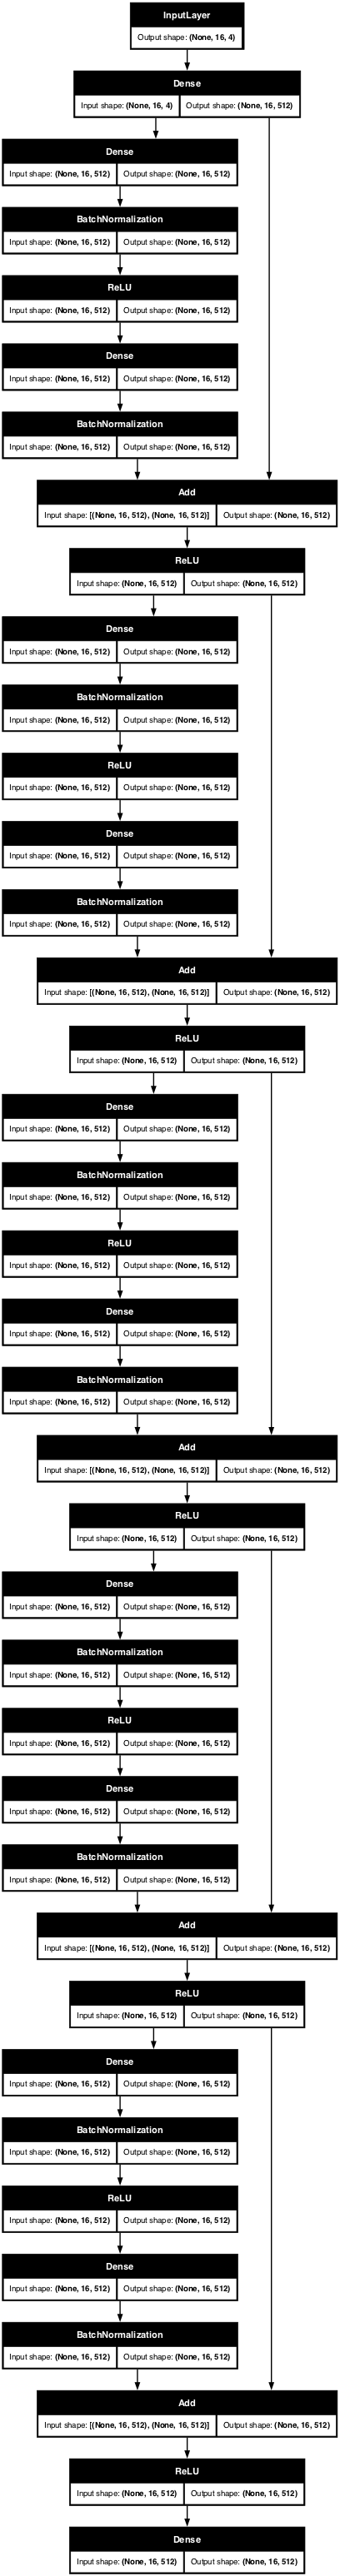

In [3]:
utils.plot_model(representation_model, show_shapes=True, dpi=50)

# Dynamics

In [4]:
dynamics_model = build_dynamics_model(state_shape=(512,), action_size=4)

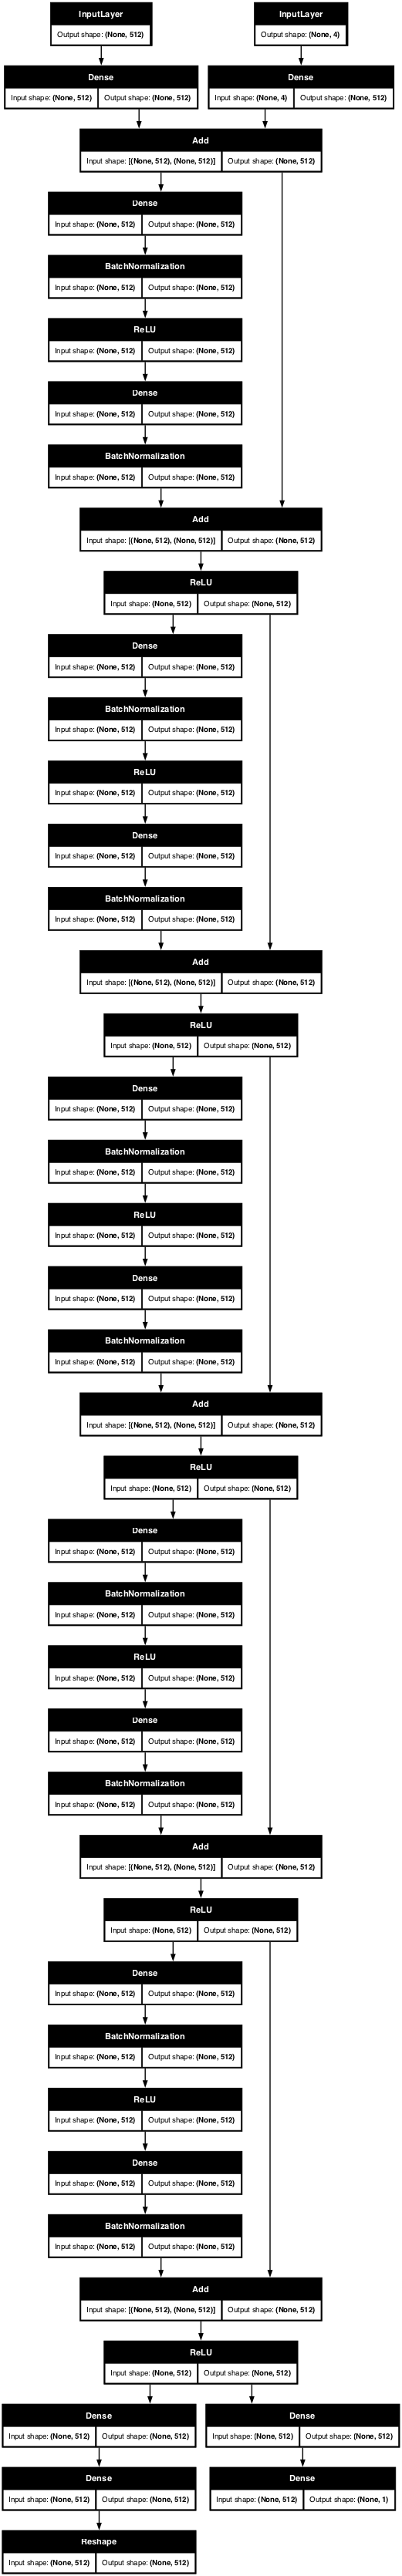

In [5]:
utils.plot_model(dynamics_model, show_shapes=True, dpi=50)

# Prediction

In [6]:
prediction_model = build_prediction_model(state_shape=(512,), action_size=4)

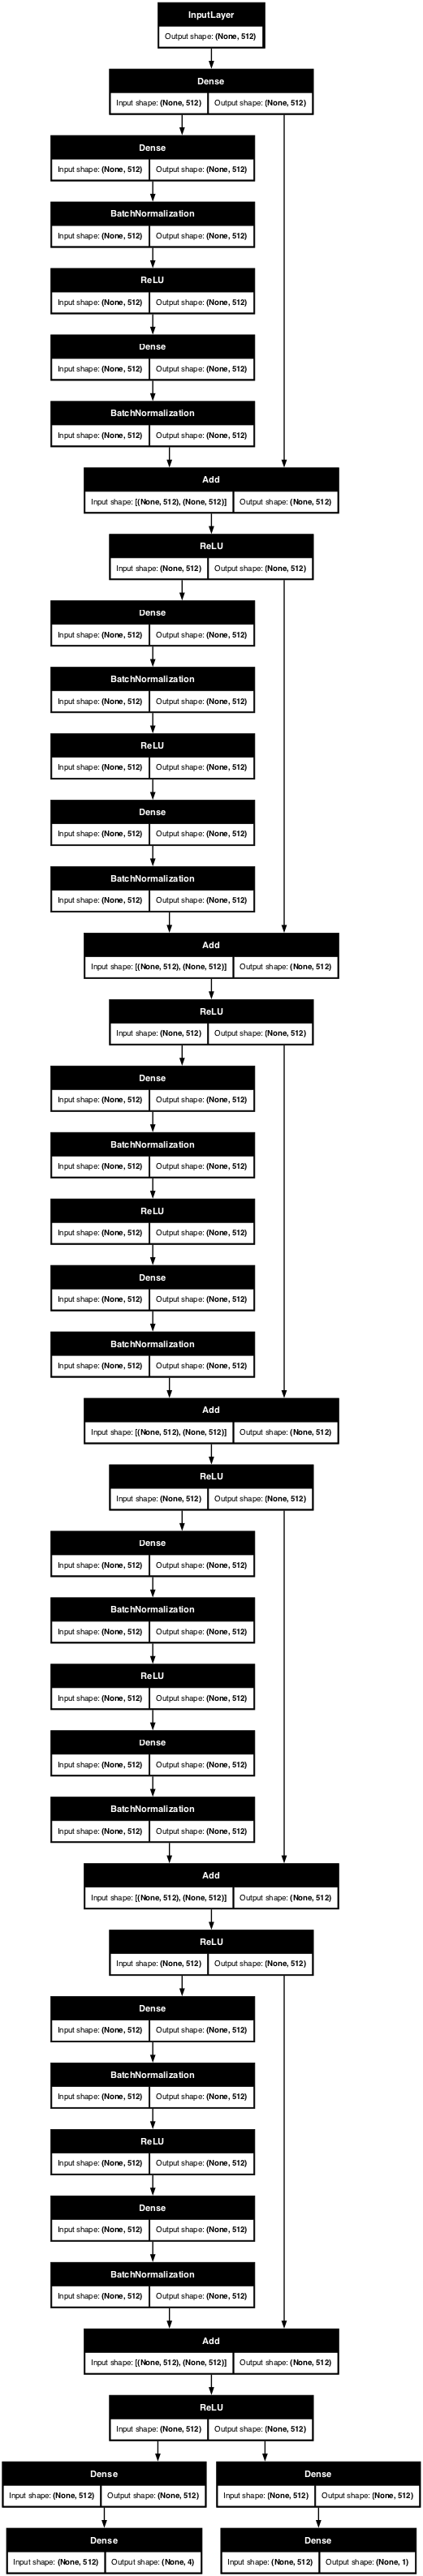

In [7]:
utils.plot_model(prediction_model, show_shapes=True, dpi=50)